In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import json
import pandas as pd
import os

# 데이터분석

## skeleton

In [77]:
DATA_FILE = "/gdrive/MyDrive/colab/data.json"
DUMP_FILE = "/gdrive/MyDrive/colab/dump.pkl"

store_columns = (
    "id",  # 음식점 고유번호
    "store_name",  # 음식점 이름
    "branch",  # 음식점 지점 여부
    "area",  # 음식점 위치
    "tel",  # 음식점 번호
    "address",  # 음식점 주소
    "latitude",  # 음식점 위도
    "longitude",  # 음식점 경도
    "category",  # 음식점 카테고리
)

review_columns = (
    "id",  # 리뷰 고유번호
    "store",  # 음식점 고유번호
    "user",  # 유저 고유번호
    "score",  # 평점
    "content",  # 리뷰 내용
    "reg_time",  # 리뷰 등록 시간
)

menu_columns = (
    "id",
    "store",
    "menu_name",
    "price",
)

user_columns = (
    "id",
    "gender",
    "age",
)

category_columns = (
    "id",
    "category"
)


def import_data(data_path=DATA_FILE):
    try:
        with open(data_path, encoding="utf-8") as f:
            data = json.loads(f.read())
    except FileNotFoundError as e:
        print(f"`{data_path}` 가 존재하지 않습니다.")
        exit(1)

    stores = []  # 음식점 테이블
    reviews = []  # 리뷰 테이블
    menus = [] # 메뉴 테이블
    users = [] # 유저 테이블
    category = [] # 카테고리 테이블

    menu_id = 0
    category_id = 0

    for d in data:
        categories = [c["category"] for c in d["category_list"]]
        for c in c
        stores.append(
            [
                d["id"],
                d["name"],
                d["branch"],
                d["area"],
                d["tel"],
                d["address"],
                d["latitude"],
                d["longitude"],
                "|".join(categories),
            ]
        )

        for review in d["review_list"]:
            r = review["review_info"]
            u = review["writer_info"]
            user_age = 2021 - int(u["born_year"]) + 1

            reviews.append(
                [r["id"], d["id"], u["id"], r["score"], r["content"], r["reg_time"]]
            )
            users.append(
                [u["id"], u["gender"], user_age]
            )

        for menu in d["menu_list"]:
            menus.append(
                [menu_id, d["id"], menu["menu"], menu["price"]]
            )
            menu_id +=1

    store_frame = pd.DataFrame(data=stores, columns=store_columns)
    review_frame = pd.DataFrame(data=reviews, columns=review_columns)
    memu_frame = pd.DataFrame(data=menus, columns=menu_columns)
    user_frame = pd.DataFrame(data=users, columns=user_columns)

    return {"stores": store_frame, "reviews": review_frame, "menus": memu_frame, "users":user_frame}


def dump_dataframes(dataframes):
    pd.to_pickle(dataframes, DUMP_FILE)


def load_dataframes():
    return pd.read_pickle(DUMP_FILE)


print("[*] Parsing data...")
raw_data = import_data()
print("[+] Done")

print("[*] Dumping data...")
dump_dataframes(raw_data)
print("[+] Done\n")

raw_data = load_dataframes()

[*] Parsing data...
[+] Done
[*] Dumping data...
[+] Done



In [75]:
stores = raw_data["stores"]
print(stores.head(), "\n")
print(stores.tail(),"\n")
print(stores.info(),"\n")
print(stores.isnull().sum(),"\n")

   id     store_name branch  ...   latitude   longitude   category
0   1           Agal   None  ...  37.556862  126.926666   아구찜|포장마차
1   2         Assisy   None  ...  35.150746  126.890062         카페
2   3  Battered Sole   None  ...  37.535032  126.991664    피쉬앤칩스|펍
3   4      Chakyoung   None  ...  35.158587  129.175004  레스토랑|카프레제
4   5       Delabobo   None  ...  37.559904  126.840512  디저트카페|디저트

[5 rows x 9 columns] 

            id store_name branch  ...   latitude   longitude category
459983  459996     행복부대찌개   None  ...  37.757939  127.032758         
459984  459997       행복부페   None  ...  37.002743  126.944991         
459985  459998       행복분식   None  ...  37.471677  127.315744         
459986  459999       행복분식   None  ...  35.407860  129.158564         
459987  460000       행복분식   None  ...  37.739845  127.038074         

[5 rows x 9 columns] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459988 entries, 0 to 459987
Data columns (total 9 columns):
 #   Column      Non

In [69]:
stores.replace(["커피", "커피|카페", "카페|커피", "브런치카페", "브런치카페|카페"], "카페", inplace=True)
# stores.replace(["이자카야|술집"], "술집", inplace=True)

In [70]:
categories = stores[["category"]].copy()

In [73]:
print(categories.value_counts().reset_index().loc[20:].head(10))

   category    0
20      추어탕  712
21       맥주  676
22     cafe  657
23      순대국  617
24      삼계탕  594
25       막창  594
26       곱창  589
27       참치  588
28      한정식  587
29      쭈꾸미  583


In [43]:
print(categories.head(), "\n")
print(categories.tail(),"\n")
print(categories.info(),"\n")
print(categories.isnull().sum(),"\n")
print(categories.sort_values(by="category", key=lambda x: x.str.len(), ascending=False))
print(categories.value_counts().reset_index())


    category
0   아구찜|포장마차
1         카페
2    피쉬앤칩스|펍
3  레스토랑|카프레제
4  디저트카페|디저트 

       category
459983         
459984         
459985         
459986         
459987          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459988 entries, 0 to 459987
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  459988 non-null  object
dtypes: object(1)
memory usage: 3.5+ MB
None 

category    0
dtype: int64 

                 category
180679  간장게장무한리필|돼지갈비무한리필
343646   전복요리|전복미역국|전복뚝배기
216624   목살스테이크|목살스테이크샐러드
216640   목살스테이크|목살스테이크샐러드
226464   월남쌈샤브샤브|샤브샤브무한리필
...                   ...
219872                   
219873                   
219877                   
219878                   
459987                   

[459988 rows x 1 columns]
            category       0
0                     183451
1                 카페   14636
2                 치킨    5019
3                 피자    1981
4                 족발    1633
...   

In [16]:
#@title 기본 제목 텍스트
print(raw_data["stores"].head())
# print(data["reviews"].head())
# print(data["users"].head())

   id     store_name branch  ...   latitude   longitude   category
0   1           Agal   None  ...  37.556862  126.926666   아구찜|포장마차
1   2         Assisy   None  ...  35.150746  126.890062         카페
2   3  Battered Sole   None  ...  37.535032  126.991664    피쉬앤칩스|펍
3   4      Chakyoung   None  ...  35.158587  129.175004  레스토랑|카프레제
4   5       Delabobo   None  ...  37.559904  126.840512  디저트카페|디저트

[5 rows x 9 columns]


In [ ]:
raw_data["reviews"].info()

raw_data["reviews"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91398 entries, 0 to 91397
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        91398 non-null  int64 
 1   store     91398 non-null  int64 
 2   user      91398 non-null  int64 
 3   score     91398 non-null  int64 
 4   content   91398 non-null  object
 5   reg_time  91398 non-null  object
dtypes: int64(4), object(2)
memory usage: 4.2+ MB


,id,store,user,score,content,reg_time
0,1,15,68632,5,전포 윗길에 새로 생긴! 호주에서 온 쉐프가 직접 요리하는 호주식 레스토랑!,1970-01-01 00:00:00
1,2,18,389728,5,샌드위치 내용물도 알차게 들어있고 맛있었어요 가성비 추천,1970-01-01 00:00:00
2,3,19,68716,4,홈플러스 1층 매장 푸드코트 내 있는 매장인데 계란찜정식은 처음보고 시켜봣는데 사진...,1970-01-01 00:00:00
3,4,37,774353,2,"전 여기 5년전에 가봤었는데 그때 기억은 별로였어요\n단체손님이 많았고, 차려지는건...",1970-01-01 00:00:00
4,5,38,115682,3,친구들끼리 술 간단하게마시러 감. 스끼다시 괜찮지만 회 양이 조금 부족한 느낌. 맛...,2019-03-15 22:16:47


In [ ]:
!sudo apt install fonts-noto-cjk
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 55.7 MB of archives.
After this operation, 92.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 fonts-noto-cjk all 1:20190409+repack1-0ubuntu0.18.04 [55.7 MB]
Fetched 55.7 MB in 3s (20.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext="ttf")
if any(["nanumbarungothic" in font.lower() for font in font_list]):
    plt.rcParams["font.family"] = "Noto Sans CJK JP"
else:
    if not any(["nanum" in font.lower() for font in font_list]):
        raise Exception(
            "Font missing, please install Noto Sans CJK or Malgun Gothic. If you're using ubuntu, try `sudo apt install fonts-noto-cjk`"
        )

    plt.rcParams["font.family"] = "NanumBarunGothic"

sns.set_palette(sns.color_palette("Spectral"))
plt.rc("xtick", labelsize=6)

In [ ]:
review_count = raw_data["reviews"].groupby(["score"])["score"].count().reset_index(name='count')
review_count

,score,count
0,0,4
1,1,5429
2,2,4658
3,3,17786
4,4,34136
5,5,29385


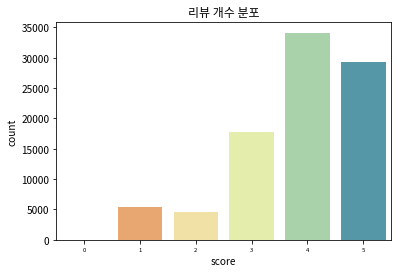

In [ ]:
sns.barplot(x="score", y="count", data=review_count)
plt.title("리뷰 개수 분포")
plt.show()

In [ ]:
stores = raw_data["reviews"].groupby(["store"])['score'].count().reset_index(name='review_count')
stores

,store,review_count
0,15,1
1,18,1
2,19,1
3,37,1
4,38,1
...,...,...
45695,360493,4
45696,360499,1
45697,360505,1
45698,360514,2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


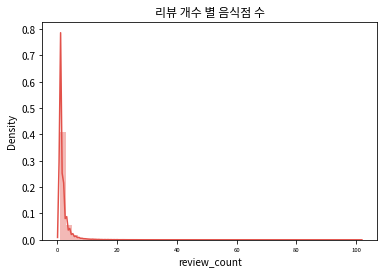

In [ ]:
sns.distplot(stores["review_count"])
plt.title("리뷰 개수 별 음식점 수")
plt.show()

## 무슬림친화레스토랑

In [76]:
MUSLIM_PATH = '/gdrive/MyDrive/colab/무슬림친화레스토랑.csv'
CSV_MUSLIM_PATH = pd.read_csv(MUSLIM_PATH, engine='python', encoding='cp949')
print(CSV_MUSLIM_PATH.head())

        레스토랑명     무슬림친화도  지역  ...      휴일 주차                관광지
0       우스마니아  무슬림 자가 인증  서울  ...     NaN  X  국립중앙박물관, 이태원 쇼핑거리
1   미스터케밥 2호점   할랄 공식 인증  서울  ...     NaN  X  국립중앙박물관, 이태원 쇼핑거리
2       카파도키아  무슬림 자가 인증  부산  ...    연중무휴  O                범어사
3     올리브레스토랑  무슬림 자가 인증  인천  ...     NaN  O            송도센트럴파크
4  봄베이인도요리전문점   무슬림 프렌들리  경남  ...  매주 월요일  O          창원시립마산박물관

[5 rows x 10 columns]


## 기초통계

Store_name 최대 글자 길이

In [ ]:
max(raw_data['stores'].store_name.map(lambda x: len(x)).max(), CSV_MUSLIM_PATH['레스토랑명'].map(lambda x: len(x)).max())

30

MUSLIM_FRIENDLY 최대 길이

In [ ]:
CSV_MUSLIM_PATH["무슬림친화도"].map(lambda x: len(x)).max()

9

무슬림레스토랑 지역 종류 및 빈도수

In [ ]:
CSV_MUSLIM_PATH['지역'].value_counts()

AttributeError: ignored

주소 최대 길이

In [ ]:
# print(raw_data['stores']['address'].map(lambda x: len(x)).max())
print(CSV_MUSLIM_PATH['주소'].map(lambda x: len(x)).max())

46


## merge : skeleton + 무슬림레스토랑


In [78]:
store_table = raw_data["stores"].copy(deep=True)
muslim_table = CSV_MUSLIM_PATH.copy(deep=True)

In [ ]:
# store_table['full_store_name'] = store_table[['store_name', 'branch']].apply(' '.join, axis=1)
# store_table['full_store_name'] = store_table["store_name"] + " " + store_table["branch"]

In [79]:
print(store_table.head())

   id     store_name branch  ...   latitude   longitude   category
0   1           Agal   None  ...  37.556862  126.926666   아구찜|포장마차
1   2         Assisy   None  ...  35.150746  126.890062         카페
2   3  Battered Sole   None  ...  37.535032  126.991664    피쉬앤칩스|펍
3   4      Chakyoung   None  ...  35.158587  129.175004  레스토랑|카프레제
4   5       Delabobo   None  ...  37.559904  126.840512  디저트카페|디저트

[5 rows x 9 columns]


In [ ]:
store_table.drop_duplicates()

,id,store_name,branch,area,tel,address,latitude,longitude,category
0,1,Agal,None,홍대,010-6689-5886,서울특별시 마포구 동교동 170-13,37.556862,126.926666,아구찜|포장마차
1,2,Assisy,None,광주,062-367-0700,광주광역시 서구 농성동 631-33,35.150746,126.890062,카페
2,3,Battered Sole,None,이태원,02-749-6867,서울특별시 용산구 이태원동 118-9,37.535032,126.991664,피쉬앤칩스|펍
3,4,Chakyoung,None,달맞이길,051-756-5566,부산광역시 해운대구 중2동 1509-5,35.158587,129.175004,레스토랑|카프레제
4,5,Delabobo,None,발산역,02-2667-9854,서울특별시 강서구 등촌동 689,37.559904,126.840512,디저트카페|디저트
...,...,...,...,...,...,...,...,...,...
459983,459996,행복부대찌개,None,녹양동,031-877-2410,경기도 의정부시 녹양동 154-6,37.757939,127.032758,
459984,459997,행복부페,None,안중읍,031-682-1733,경기도 평택시 안중읍 용성리 718-3,37.002743,126.944991,
459985,459998,행복분식,None,퇴촌면,031-8071-2668,경기도 광주 퇴촌면 도수리 611-6,37.471677,127.315744,
459986,459999,행복분식,None,소주동,055-312-3713,경상남도 양산시 소주동 147-1,35.407860,129.158564,


In [80]:
store_table.columns

Index(['id', 'store_name', 'branch', 'area', 'tel', 'address', 'latitude',
       'longitude', 'category'],
      dtype='object')

In [81]:
muslim_table.columns = ['store_name', 'muslim_friendly', 'location_region', 'food_category', 'address', 'tel', 'working_time', 'days_closed','parking','tourism']
muslim_table.head()

,store_name,muslim_friendly,location_region,food_category,address,tel,working_time,days_closed,parking,tourism
0,우스마니아,무슬림 자가 인증,서울,파키스탄음식,서울 용산구 우사단로 34,02-798-7155,11:00-22:00,NaN,X,"국립중앙박물관, 이태원 쇼핑거리"
1,미스터케밥 2호점,할랄 공식 인증,서울,터키음식,서울 용산구 우사단로 42,070-7532-1997,08:00-05:00,NaN,X,"국립중앙박물관, 이태원 쇼핑거리"
2,카파도키아,무슬림 자가 인증,부산,터키음식,부산 금정구 금단로 123-9,051-515-5981,11:30-22:00,연중무휴,O,범어사
3,올리브레스토랑,무슬림 자가 인증,인천,아랍음식,인천 연수구 옥련로 31,032-874-2800,10.30-22:00,NaN,O,송도센트럴파크
4,봄베이인도요리전문점,무슬림 프렌들리,경남,인도음식,경남 창원시 성산구 용지로 74,055-263-4111,"11:30-22:00(브레이크 타임 15:00-17:00, 주말에는 브레이크 타임 없음)",매주 월요일,O,창원시립마산박물관


### 가게 이름으로 묶기


In [85]:
df_merge = pd.merge(muslim_table, store_table, on='store_name')
print(df_merge)
print(df_merge.info())

    store_name muslim_friendly location_region  ...   latitude   longitude  category
0        우스마니아       무슬림 자가 인증              서울  ...  37.533204  126.995705        인도
1        카파도키아       무슬림 자가 인증              부산  ...  35.259937  129.092210    터키|이슬람
2      올리브레스토랑       무슬림 자가 인증              인천  ...  37.792146  128.872874          
3        고향먹거리        무슬림 프렌들리              강원  ...  37.754005  128.898640  황태구이|막국수
4          미가미        무슬림 프렌들리              서울  ...  37.492567  127.029654    일식집|알밥
..         ...             ...             ...  ...        ...         ...       ...
768      카사블랑카        무슬림 프렌들리              서울  ...  37.434406  127.159165          
769      카사블랑카        무슬림 프렌들리              서울  ...  37.541531  126.987046  모로코|샌드위치
770      카사블랑카        무슬림 프렌들리              서울  ...  35.259639  128.612449          
771      카사블랑카        무슬림 프렌들리              서울  ...  34.842610  128.423302          
772      카사블랑카        무슬림 프렌들리              서울  ...  37.514900  1

In [129]:
# null 또는 빈 문자열 처리하기
df_merge[
         (df_merge.food_category.isnull()) &
         (df_merge.category == "")]

,store_name,muslim_friendly,location_region,food_category,address_x,tel_x,working_time,days_closed,parking,tourism,id,branch,area,tel_y,address_y,latitude,longitude,category
128,사마르칸트,무슬림 프렌들리,부산,NaN,부산 동구 대영로243번길 37 4층,051-465-4734,11:00-24:00,연중무휴,X,"산복도로 초량이바구길, 국제시장, 보수동 책방골목",204249,None,동대문역,032-773-6700,인천광역시 중구 신포동 20-1,37.470720,126.626900,
132,사마르칸트,무슬림 프렌들리,대구,NaN,대구 중구 동성로 59 3층,053-252-4021,11:00-21:00,연중무휴,X,"주얼리패션타운, 경상감영공원, 북성로공구박물관",204249,None,동대문역,032-773-6700,인천광역시 중구 신포동 20-1,37.470720,126.626900,


In [ ]:
# 특정 행 k의 값 변경 : pd.loc[k] = 
# 특정 컬럼만 뽑기 : pd_

In [ ]:
# 조건 - 만일 category가 빈 문자열 이라면 category칼럼의 값은 해당 행의 food_category로 변경할 것
# df_merge.loc[df_merge["category"] == "", "category"] = "England"
# df_merge["category"] = df_merge.apply(lambda x: )

for 

In [ ]:
# 카테고리 스플릿
df.category.str.split("|")

In [116]:
df_merge.isnull().sum()

store_name           0
muslim_friendly      0
location_region      0
food_category       28
address_x            0
tel_x                0
working_time         0
days_closed         89
parking              0
tourism              0
id                   0
branch             722
area                15
tel_y               11
address_y            0
latitude             0
longitude            0
category             0
dtype: int64

In [106]:
df_merge[["store_name","food_category","category"]]

,store_name,food_category,category
0,우스마니아,파키스탄음식,인도
1,카파도키아,터키음식,터키|이슬람
2,올리브레스토랑,아랍음식,
3,고향먹거리,한식,황태구이|막국수
4,미가미,일식,일식집|알밥
...,...,...,...
768,카사블랑카,모로코음식,
769,카사블랑카,모로코음식,모로코|샌드위치
770,카사블랑카,모로코음식,
771,카사블랑카,모로코음식,


In [ ]:
df_merge.drop_duplicates("store_name", inplace=True)
print(df_merge.shape)

(345, 18)


In [ ]:
print(muslim_table.shape)

(347, 10)


#### 가게이름으로 기초통계

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 976
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   store_name       345 non-null    object 
 1   muslim_friendly  345 non-null    object 
 2   location_region  345 non-null    object 
 3   food_category    288 non-null    object 
 4   address_x        345 non-null    object 
 5   tel_x            345 non-null    object 
 6   working_time     345 non-null    object 
 7   days_closed      222 non-null    object 
 8   parking          345 non-null    object 
 9   tourism          345 non-null    object 
 10  id               141 non-null    float64
 11  branch           11 non-null     object 
 12  area             139 non-null    object 
 13  tel_y            140 non-null    object 
 14  address_y        141 non-null    object 
 15  latitude         141 non-null    object 
 16  longitude        141 non-null    object 
 17  category        

주소 교집합

In [ ]:
df_merge.columns

Index(['store_name', 'muslim_friendly', 'location_region', 'food_category',
       'address_x', 'tel_x', 'working_time', 'days_closed', 'parking',
       'tourism', 'id', 'branch', 'area', 'tel_y', 'address_y', 'latitude',
       'longitude', 'category'],
      dtype='object')

In [ ]:
df_merge[df_merge['address_x'] == df_merge['address_y']]

,store_name,muslim_friendly,location_region,food_category,address_x,tel_x,working_time,days_closed,parking,tourism,id,branch,area,tel_y,address_y,latitude,longitude,category


In [ ]:
df_merge[df_merge['tel_x'] == df_merge['tel_y']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 962
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   store_name       74 non-null     object 
 1   muslim_friendly  74 non-null     object 
 2   location_region  74 non-null     object 
 3   food_category    63 non-null     object 
 4   address_x        74 non-null     object 
 5   tel_x            74 non-null     object 
 6   working_time     74 non-null     object 
 7   days_closed      48 non-null     object 
 8   parking          74 non-null     object 
 9   tourism          74 non-null     object 
 10  id               74 non-null     float64
 11  branch           4 non-null      object 
 12  area             72 non-null     object 
 13  tel_y            74 non-null     object 
 14  address_y        74 non-null     object 
 15  latitude         74 non-null     object 
 16  longitude        74 non-null     object 
 17  category         

## merge : review + user

In [ ]:
user_table = raw_data["users"].copy()
user_table.columns

Index(['id', 'gender', 'age'], dtype='object')

In [ ]:
review_table = raw_data["reviews"].copy()
review_table.columns

Index(['id', 'store', 'user', 'score', 'content', 'reg_time'], dtype='object')

In [ ]:
df_review_user = pd.merge(review_table, user_table, left_on='user', right_on='id')
df_review_user.drop_duplicates("content", inplace=True)
df_review_user.columns

Index(['id_x', 'store', 'user', 'score', 'content', 'reg_time', 'id_y',
       'gender', 'age'],
      dtype='object')

## merge: merged + reivew_merged

In [ ]:
df_merged = pd.merge(df_merge, df_review_user, left_on='id', right_on='store')
df_merged.shape

(113, 27)

In [ ]:
df_tel_merged = pd.merge(df_tel, df_review_user, left_on='id', right_on='store')
df_tel_merged.shape

(179, 27)

In [ ]:
df_tel_merged.head()

,store_name_x,muslim_friendly,location_region,food_category,address_x,tel,working_time,days_closed,parking,tourism,id,store_name_y,branch,area,address_y,latitude,longitude,category,id_x,store,user,score,content,reg_time,id_y,gender,age
0,우스마니아,무슬림 자가 인증,서울,파키스탄음식,서울 용산구 우사단로 34,02-798-7155,11:00-22:00,NaN,X,"국립중앙박물관, 이태원 쇼핑거리",308561,우스마니아,None,이태원,서울시 용산구 이태원동 137-56,37.533204,126.995705,인도,1770,308561,90292,4,"가게가 너무너무 추웠다는 점 빼고 맛났던 가게. 원래 다른 가게 가려다가 닫아서, ...",1970-01-01 00:00:00,90292,여,26
1,우스마니아,무슬림 자가 인증,서울,파키스탄음식,서울 용산구 우사단로 34,02-798-7155,11:00-22:00,NaN,X,"국립중앙박물관, 이태원 쇼핑거리",308561,우스마니아,None,이태원,서울시 용산구 이태원동 137-56,37.533204,126.995705,인도,1769,308561,225842,4,맛있어요 현지의 맛. 향신료 좋아해서 되게 잘 맞았어요. 역시 인도커리는 이태원와서...,1970-01-01 00:00:00,225842,여,23
2,미스터케밥 2호점,할랄 공식 인증,서울,터키음식,서울 용산구 우사단로 42,070-7532-1997,08:00-05:00,NaN,X,"국립중앙박물관, 이태원 쇼핑거리",159619,미스터케밥,2호점,이태원,서울특별시 용산구 이태원동 136-45,37.533886,126.995786,케밥|터키,4859,159619,109581,5,이태원에서 꽤 오래된 케밥집.\r\n고기를 푸짐하게 썰어주는 편이라서 이태원에서 케...,1970-01-01 00:00:00,109581,여,34
3,케르반 카페,무슬림 자가 인증,서울,터키음식,서울시 용산구 우사단로10길 17,070-7532-1997,"평일 12:00~20:00, 금~일요일 11:00~20:00",NaN,X,"경리단길, 이태원쇼핑거리, 전쟁기념관",159619,미스터케밥,2호점,이태원,서울특별시 용산구 이태원동 136-45,37.533886,126.995786,케밥|터키,4859,159619,109581,5,이태원에서 꽤 오래된 케밥집.\r\n고기를 푸짐하게 썰어주는 편이라서 이태원에서 케...,1970-01-01 00:00:00,109581,여,34
4,라마앤바바나 서면점,무슬림 프렌들리,부산,아시아음식,부산 부산진구 중앙대로702번길 33,051-804-0901,11:30-22:00,명절 당일,O,"이기대 도시자연공원, 오륙도 스카이워크",118253,라마앤바바나,None,서면,부산광역시 부산진구 부전동 226-1,35.153313,129.060440,인도요리|라씨,6392,118253,728391,5,"나시고랭이 전혀 나시고랭이 아니지만 뭔가처음먹어보는 맛있는 음식이었고, 요거트도 적...",1970-01-01 00:00:00,728391,남,39
